In [1]:
# !pip install keras-flops
# from keras_flops import get_flops

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import pickle as pk
from keras.models import load_model
import keras.datasets as dataset
from keras.utils import np_utils
import numpy as np
import time

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
dir_path = '/content/gdrive/My Drive/Fall20/10617_IDL/Project/results/'
sparsity = ['50','80','90','95']
plot_color = ['b','r','g','y']
data = 'CIFAR10'

Text(0, 0.5, 'Validation Accuracy')

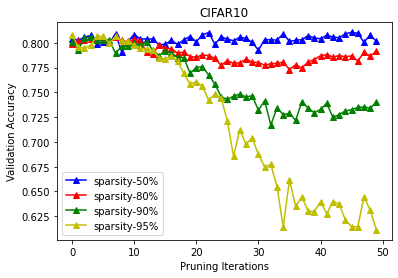

In [29]:
fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.15, right=0.9, top=0.9)
for i in range(4):
  folder_name = dir_path+data+'/sparse-{d}/'.format(d=sparsity[i])
  with open(folder_name+'metric-{d}.pkl'.format(d=sparsity[i]),'rb') as f:
    metric = pk.load(f)
  f.close()
  ax.plot(range(len(metric[1])),metric[1],plot_color[i]+'-^',label='sparsity-{d}%'.format(d=sparsity[i]))

ax.legend()
ax.set_title(data)
ax.set_xlabel('Pruning Iterations')
ax.set_ylabel('Validation Accuracy')
# fig.set_size_inches(width, height)
# fig.savefig(dir_path+data+'/{d}-prune-valAcc.pdf'.format(d=data),format='pdf')

In [30]:
def NNZ(weights):
  zeroCount = 0
  for ele in weights:
    if ele != 0.0:
      zeroCount += 1

  return zeroCount

model_name = dir_path+data+'/baseline/baseline-model.h5'
model = load_model(model_name)
allWeights = np.array([1],dtype=float)
for weight in model.get_weights():
  allWeights = np.concatenate((allWeights,weight.flatten()))
nnz_base = NNZ(allWeights[1:])
print("Number of Non-zero Params for baseline model: {e} ".format(e=nnz_base/nnz_base))

sparsity = ['50','80','90','95']
for i in range(4):
  model_name = dir_path+data+'/sparse-{d}/'.format(d=sparsity[i])+'pruned-model-{d}.h5'.format(d=sparsity[i])
  model = load_model(model_name)

  allWeights = np.array([1],dtype=float)
  for weight in model.get_weights():
    allWeights = np.concatenate((allWeights,weight.flatten()))
  nnz = NNZ(allWeights[1:])
  print("Number of Non-zero Params for model with sparsity level - {d}%: {e} ".format(d=sparsity[i], e=nnz_base/nnz))
  # print("Sparsity - {d}%".format(d=np.round(1-nnz/allWeights[1:].shape[0]*100,2)))  


Number of Non-zero Params for baseline model: 1.0 
Number of Non-zero Params for model with sparsity level - 50%: 1.9988590348777378 
Number of Non-zero Params for model with sparsity level - 80%: 4.988605863374052 
Number of Non-zero Params for model with sparsity level - 90%: 9.94892148129295 
Number of Non-zero Params for model with sparsity level - 95%: 19.785482671896997 


In [31]:
cifar = dataset.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
num_classes = 10
train_labels = np_utils.to_categorical(train_labels,num_classes)
test_labels = np_utils.to_categorical(test_labels,num_classes)

In [32]:
model_name = dir_path+data+'/baseline/baseline-model.h5'
model = load_model(model_name)
model.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])
# import tensorflow as tf
# model.compile(optimizer='adam',
#             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#             metrics=['accuracy'])

print('Baseline: ',model.evaluate(test_images,test_labels))

for i in range(4):
  model_name = dir_path+data+'/sparse-{d}/'.format(d=sparsity[i])+'pruned-model-{d}.h5'.format(d=sparsity[i])
  model = load_model(model_name)
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  # model.compile(optimizer='adam',
  #             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  #             metrics=['accuracy'])

  print('{d}% sparse - {e}'.format(d=sparsity[i],e=model.evaluate(test_images,test_labels)))

313/313 [==============================] - 1s 3ms/step - loss: 0.7270 - accuracy: 0.7929
Baseline:  [0.7270348072052002, 0.792900025844574]
313/313 [==============================] - 1s 3ms/step - loss: 0.7377 - accuracy: 0.8013
50% sparse - [0.7377097010612488, 0.8012999892234802]
313/313 [==============================] - 1s 3ms/step - loss: 0.6329 - accuracy: 0.7915
80% sparse - [0.6328520178794861, 0.7914999723434448]
313/313 [==============================] - 1s 3ms/step - loss: 0.7340 - accuracy: 0.7402
90% sparse - [0.7340494990348816, 0.7401999831199646]
313/313 [==============================] - 1s 3ms/step - loss: 1.0775 - accuracy: 0.6112
95% sparse - [1.0774695873260498, 0.6111999750137329]
